# Parte 1: Aprendizaje Supervisado

### 1. Preprocesar los datos, dividirlos en conjuntos de entrenamiento, validación y testeo y normalizar los mismos.

In [5]:
#%% Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos supervisados
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Visualización y manipulación de gráficos
from six import StringIO
from IPython.display import Image  
import pydotplus

# Métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#%% Leer el CSV de estrellas
data = pd.read_csv('estrellas.csv')
print(data.head())

#%% Evaluar datos faltantes
print(data.isnull().sum())

print(data['Spectral Class'].unique())

# %% Separar características (X) y la variable objetivo (y)
X = data.drop(columns='Spectral Class')
y = data['Spectral Class']

#%% Dividir en conjuntos de entrenamiento (80%) y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#%% Dividir el conjunto de entrenamiento en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ver los tipos de dato de cada columna
print(X_train.dtypes)

# %% Preprocesar variables categóricas
# Aplicar one-hot encoding a X
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

print(X_train.head())

# Asegurar que X_val y X_test tengan las mismas columnas que X_train
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#%% Normalizar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)




   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category Star color Spectral Class  
0          0   Brown Dwarf        Red              M  
1          0   Brown Dwarf        Red              M  
2          0   Brown Dwarf        Red              M  
3          0   Brown Dwarf        Red              M  
4          0   Brown Dwarf        Red              M  
Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star colo

### 2. Crear 3 modelos de entrenamiento, probarlos y comparar métricas obtenidas para cada uno


Resultados para Random Forest:
Accuracy: 0.8461538461538461
Precision: 0.849859943977591
Recall: 0.8461538461538461
F1: 0.8321678321678322


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


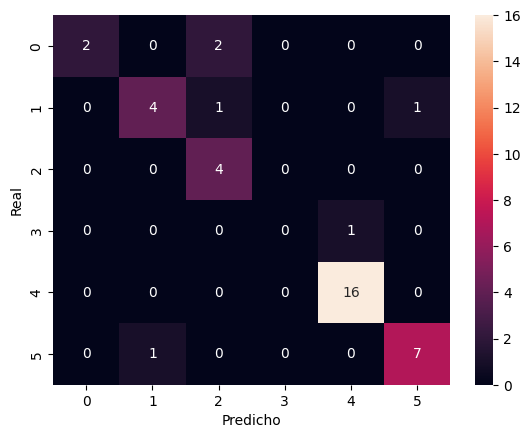


Resultados para KNN:
Accuracy: 0.8717948717948718
Precision: 0.8697419138595609
Recall: 0.8717948717948718
F1: 0.8570645041233277


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


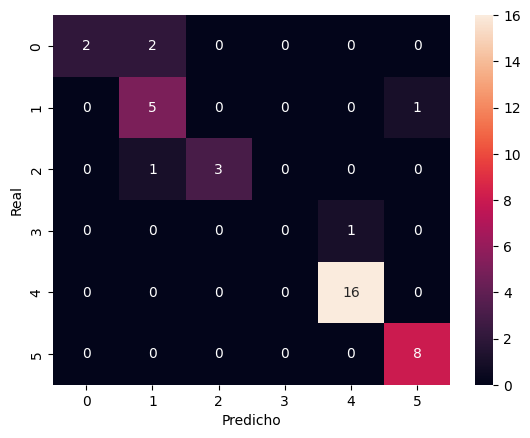


Resultados para SVM:
Accuracy: 0.8717948717948718
Precision: 0.8746438746438747
Recall: 0.8717948717948718
F1: 0.8707175177763414


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


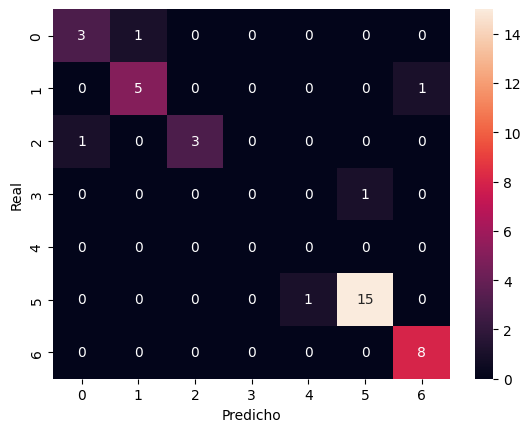

In [11]:
#%% Función para calcular métricas de evaluación
def obtener_metricas_evaluacion(y_real, y_predicho):
    '''Obtener métricas de evaluación'''
    print('Accuracy:', accuracy_score(y_real, y_predicho))
    print('Precision:', precision_score(y_real, y_predicho, average='weighted'))
    print('Recall:', recall_score(y_real, y_predicho, average='weighted'))
    print('F1:', f1_score(y_real, y_predicho, average='weighted'))
    
    matrix_confusion = confusion_matrix(y_real, y_predicho)
    sns.heatmap(matrix_confusion, annot=True, fmt='d')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()



# %% Entrenar y evaluar modelo Random Forest
modelo_random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
modelo_random_forest.fit(X_train, y_train)
y_pred = modelo_random_forest.predict(X_val)

print("\nResultados para Random Forest:")
obtener_metricas_evaluacion(y_val, y_pred)

# %% Entrenar y evaluar modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train, y_train)
y_pred = modelo_knn.predict(X_val)

print("\nResultados para KNN:")
obtener_metricas_evaluacion(y_val, y_pred)

# %% Entrenar y evaluar modelo SVM
modelo_svm = SVC(C=1.0, kernel='linear')
modelo_svm.fit(X_train, y_train)
y_pred = modelo_svm.predict(X_val)

print("\nResultados para SVM:")
obtener_metricas_evaluacion(y_val, y_pred)

### 3. Investigar acerca de hiperparámetros de cada modelo, cambiar dos en cada uno y probar nuevamente los modelos comparando sus métricas de evaluación


--- Random Forest Modelos ---

Resultados para Random Forest (Original):
Accuracy: 0.8461538461538461
Precision: 0.849859943977591
Recall: 0.8461538461538461
F1: 0.8321678321678322


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


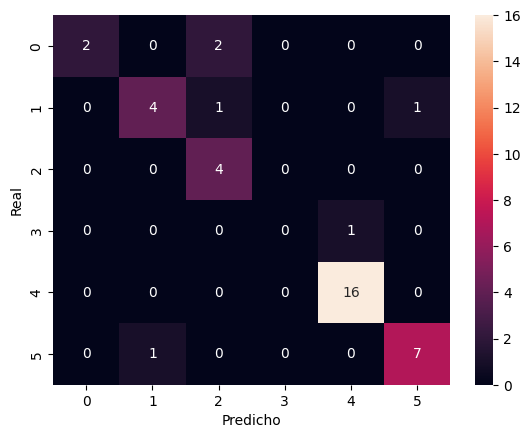


Resultados para Random Forest (n_estimators=200, max_depth=15):
Accuracy: 0.8461538461538461
Precision: 0.849859943977591
Recall: 0.8461538461538461
F1: 0.8321678321678322


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


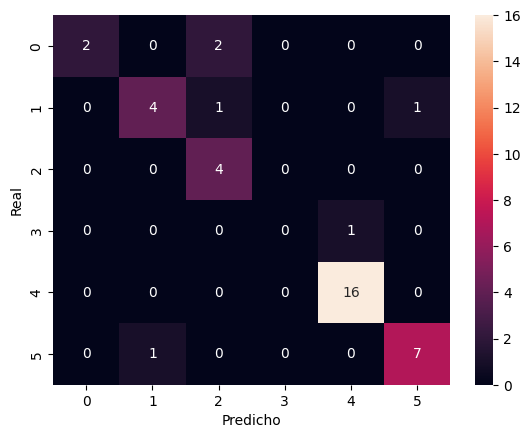


Resultados para Random Forest (min_samples_split=5, max_features='sqrt'):
Accuracy: 0.8461538461538461
Precision: 0.849859943977591
Recall: 0.8461538461538461
F1: 0.8321678321678322


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


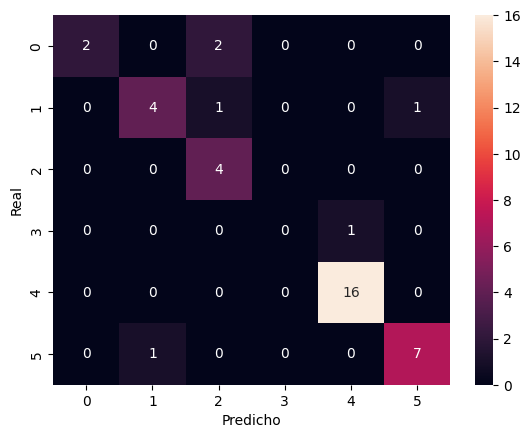


--- KNN Modelos ---

Resultados para KNN (Original):
Accuracy: 0.8717948717948718


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.8697419138595609
Recall: 0.8717948717948718
F1: 0.8570645041233277


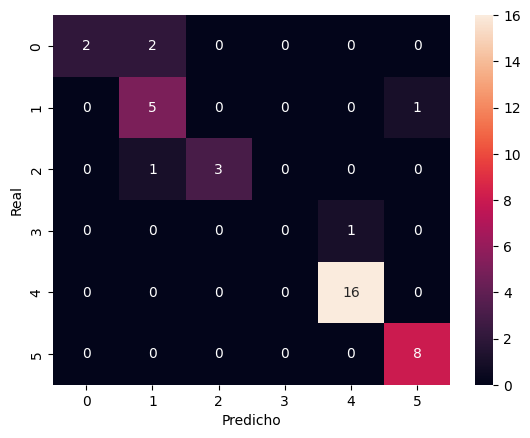


Resultados para KNN (n_neighbors=5, weights='distance'):
Accuracy: 0.8974358974358975
Precision: 0.8834781775958246
Recall: 0.8974358974358975
F1: 0.8850536090355096


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


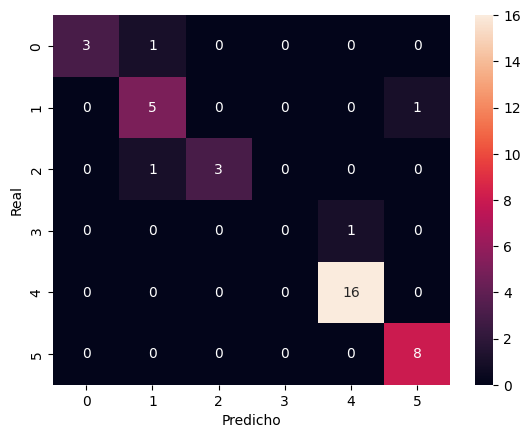


Resultados para KNN (n_neighbors=7, metric='manhattan'):
Accuracy: 0.8461538461538461
Precision: 0.8590581531758003
Recall: 0.8461538461538461
F1: 0.8223880694468929


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


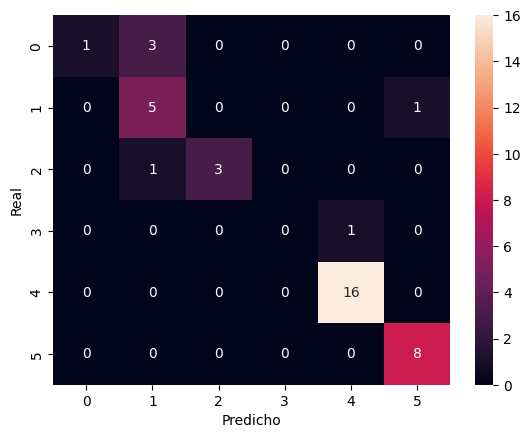


--- SVM Modelos ---

Resultados para SVM (Original):
Accuracy: 0.8717948717948718
Precision: 0.8746438746438747
Recall: 0.8717948717948718
F1: 0.8707175177763414


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


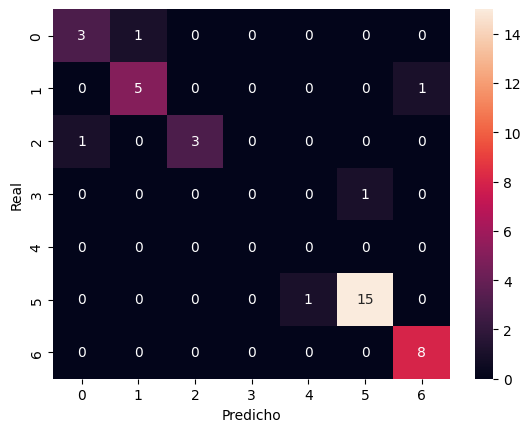


Resultados para SVM (C=0.5, kernel='rbf'):
Accuracy: 0.8205128205128205
Precision: 0.8393162393162393
Recall: 0.8205128205128205
F1: 0.7984533984533985


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


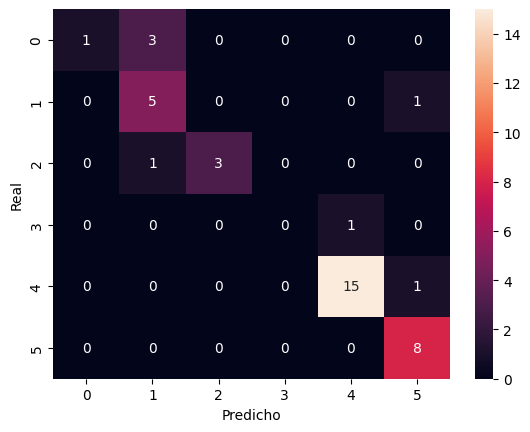


Resultados para SVM (C=2.0, kernel='rbf', gamma='scale'):
Accuracy: 0.8461538461538461
Precision: 0.85
Recall: 0.8461538461538461
F1: 0.8331298331298331


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


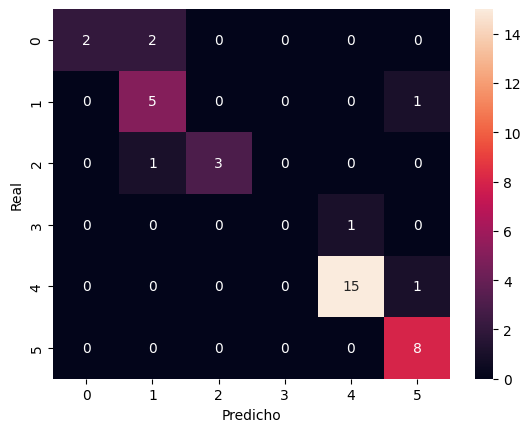

In [36]:
# %% Modelos Random Forest
print("\n--- Random Forest Modelos ---")
# Modelo original de Random Forest
modelo_random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
modelo_random_forest.fit(X_train, y_train)
y_pred = modelo_random_forest.predict(X_val)
print("\nResultados para Random Forest (Original):")
obtener_metricas_evaluacion(y_val, y_pred)

# Nuevo Modelo 2 de Random Forest
modelo_random_forest_v1 = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
modelo_random_forest_v1.fit(X_train, y_train)
y_pred = modelo_random_forest_v1.predict(X_val)
print("\nResultados para Random Forest (n_estimators=200, max_depth=15):")
obtener_metricas_evaluacion(y_val, y_pred)

# Nuevo Modelo 3 de Random Forest
modelo_random_forest_v2 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, max_features="sqrt", random_state=42)
modelo_random_forest_v2.fit(X_train, y_train)
y_pred = modelo_random_forest_v2.predict(X_val)
print("\nResultados para Random Forest (min_samples_split=5, max_features='sqrt'):")
obtener_metricas_evaluacion(y_val, y_pred)

# %% Modelos KNN
print("\n--- KNN Modelos ---")
# Modelo original de KNN
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train, y_train)
y_pred = modelo_knn.predict(X_val)
print("\nResultados para KNN (Original):")
obtener_metricas_evaluacion(y_val, y_pred)

# Nuevo Modelo 2 de KNN
modelo_knn_v1 = KNeighborsClassifier(n_neighbors=5, weights="distance")
modelo_knn_v1.fit(X_train, y_train)
y_pred = modelo_knn_v1.predict(X_val)
print("\nResultados para KNN (n_neighbors=5, weights='distance'):")
obtener_metricas_evaluacion(y_val, y_pred)

# Nuevo Modelo 3 de KNN
modelo_knn_v2 = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
modelo_knn_v2.fit(X_train, y_train)
y_pred = modelo_knn_v2.predict(X_val)
print("\nResultados para KNN (n_neighbors=7, metric='manhattan'):")
obtener_metricas_evaluacion(y_val, y_pred)

# %% Modelos SVM
print("\n--- SVM Modelos ---")
# Modelo original de SVM
modelo_svm = SVC(C=1.0, kernel='linear')
modelo_svm.fit(X_train, y_train)
y_pred = modelo_svm.predict(X_val)
print("\nResultados para SVM (Original):")
obtener_metricas_evaluacion(y_val, y_pred)

# Nuevo Modelo 2 de SVM
modelo_svm_v1 = SVC(C=0.5, kernel='rbf')
modelo_svm_v1.fit(X_train, y_train)
y_pred = modelo_svm_v1.predict(X_val)
print("\nResultados para SVM (C=0.5, kernel='rbf'):")
obtener_metricas_evaluacion(y_val, y_pred)

# Nuevo Modelo 3 de SVM
modelo_svm_v2 = SVC(C=2.0, kernel='rbf', gamma='scale')
modelo_svm_v2.fit(X_train, y_train)
y_pred = modelo_svm_v2.predict(X_val)
print("\nResultados para SVM (C=2.0, kernel='rbf', gamma='scale'):")
obtener_metricas_evaluacion(y_val, y_pred)

### 4. Seleccionar el mejor modelo obtenido, probarlo en el conjunto de testeo y comparar las métricas obtenidas respecto al mismo modelo y sus métricas obtenidas con el conjunto de validación


Resultados para KNN (n_neighbors=5, weights='distance'):
Accuracy: 0.8974358974358975
Precision: 0.8834781775958246
Recall: 0.8974358974358975
F1: 0.8850536090355096


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


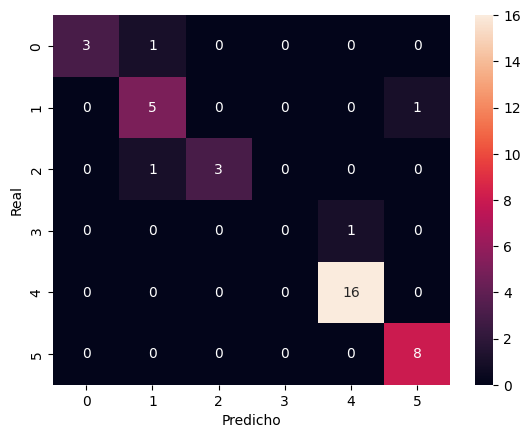


Resultados en el conjunto de Prueba para KNN (n_neighbors=5, weights='distance'):
Accuracy: 0.8958333333333334
Precision: 0.859683794466403
Recall: 0.8958333333333334
F1: 0.8706559644059645


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


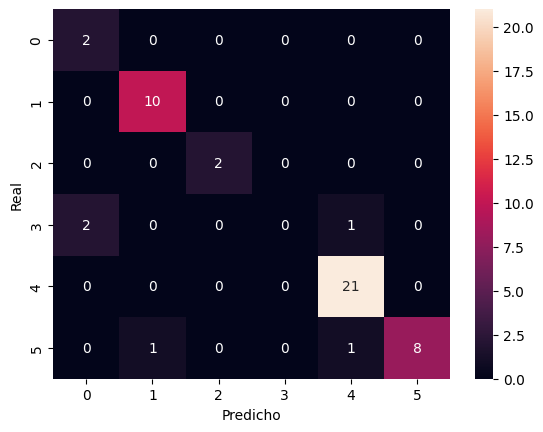

In [38]:
# Modelo 2 de KNN

# Evaluo en el conjunto de validación (ya hecho, pero repetimos para comparar)
modelo_knn_v1 = KNeighborsClassifier(n_neighbors=5, weights="distance")
modelo_knn_v1.fit(X_train, y_train)
y_pred = modelo_knn_v1.predict(X_val)
print("\nResultados para KNN (n_neighbors=5, weights='distance'):")
obtener_metricas_evaluacion(y_val, y_pred)

# Evaluo en el conjunto de prueba (test)
print("\nResultados en el conjunto de Prueba para KNN (n_neighbors=5, weights='distance'):")
y_pred_test = modelo_knn_v1.predict(X_test)
obtener_metricas_evaluacion(y_test, y_pred_test)

# Parte 2: Aprendizaje No Supervisado

### 1. Preprocesar los datos incluyendo la normalización de los mismos.

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

#%% Leer el CSV de estrellas
data = pd.read_csv('clientes_shopping.csv')
print(data.head())

# Ver los tipos de dato de cada columna
print(data.info())

label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])

print(data.head())

# Normalizar
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data.iloc[:, 1:])
df_scaled = pd.DataFrame(df_scaled, columns=data.columns[1:])
df_scaled.head(5)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spe

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


### 2. Realizar gráficos de dispersión

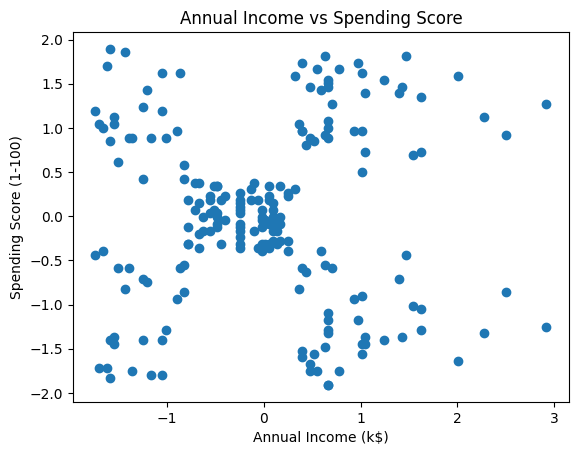

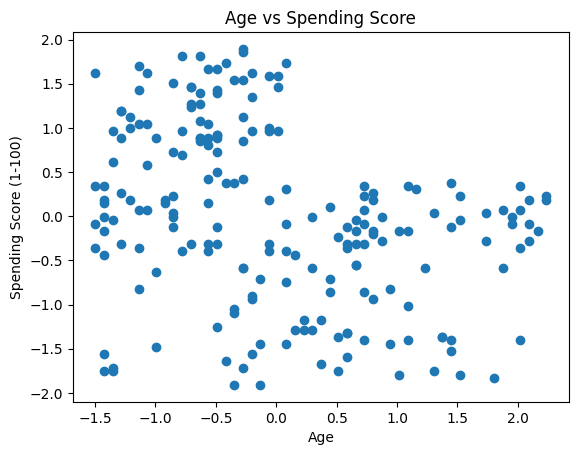

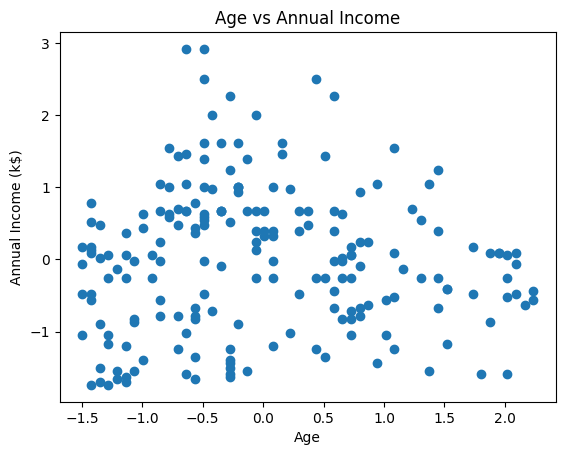

In [11]:
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.show()

plt.scatter(df_scaled['Age'], df_scaled['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score")
plt.show()

plt.scatter(df_scaled['Age'], df_scaled['Annual Income (k$)'])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Age vs Annual Income")
plt.show()

### Aplicar modelo de agrupamiento KMeans

#### Encontrar valor de K

##### Modelo del codo

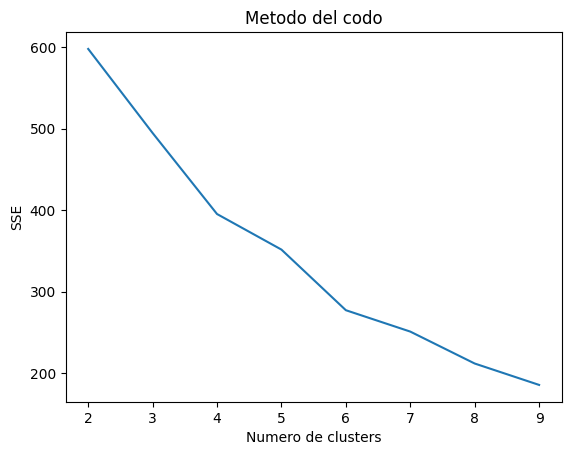

In [13]:
def metodo_codo(df, max_clusters):
    
    sse = []
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
    plt.plot(range(2, max_clusters), sse)
    plt.xlabel('Numero de clusters')
    plt.ylabel('SSE')
    plt.title('Metodo del codo')
    plt.show()

metodo_codo(df_scaled.iloc[:,:], 10)

##### Aplicando índice de Silueta

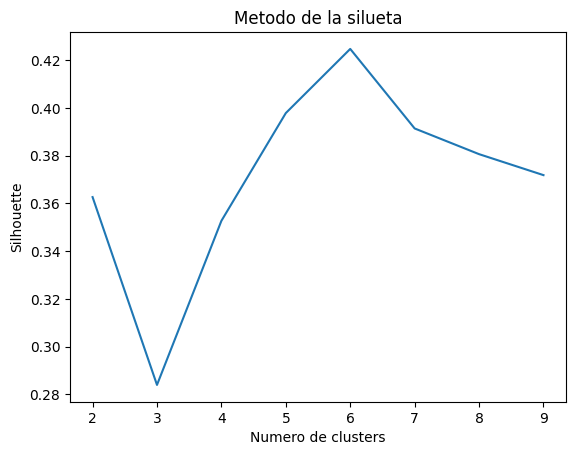

In [15]:
def metodo_silueta(df, max_clusters):
    
    silhouette = []
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df)
        silhouette.append(silhouette_score(df, kmeans.labels_))
    plt.plot(range(2, max_clusters), silhouette)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Silhouette')
    plt.title('Metodo de la silueta')
    plt.show

metodo_silueta(df_scaled.iloc[:,:-1], 10)

In [16]:
kmeans = KMeans(n_clusters=6, random_state=42) # Crear instancia de KMeans con 6 clusters y semilla 42
kmeans.fit(df_scaled)    # Ajustar el modelo KMeans a los datos
df_scaled['cluster'] = kmeans.labels_ # Añadir las etiquetas de los clusters al DataFrame escalado

df_scaled.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1.128152,-1.424569,-1.738999,-0.434801,2
1,1.128152,-1.281035,-1.738999,1.195704,2
2,-0.886405,-1.352802,-1.700830,-1.715913,4
3,-0.886405,-1.137502,-1.700830,1.040418,4
4,-0.886405,-0.563369,-1.662660,-0.395980,4


### 4. Graficamos incluyendo color de cada cluster

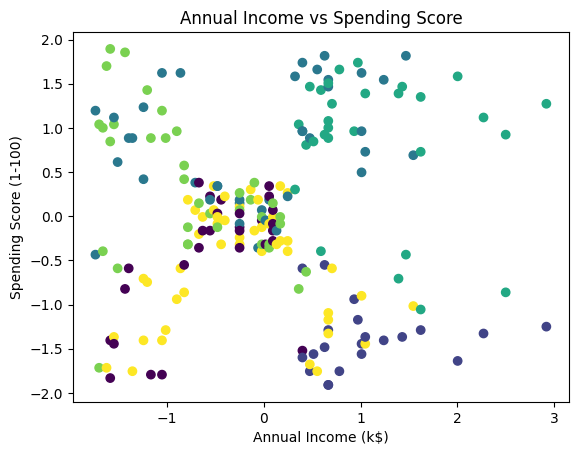

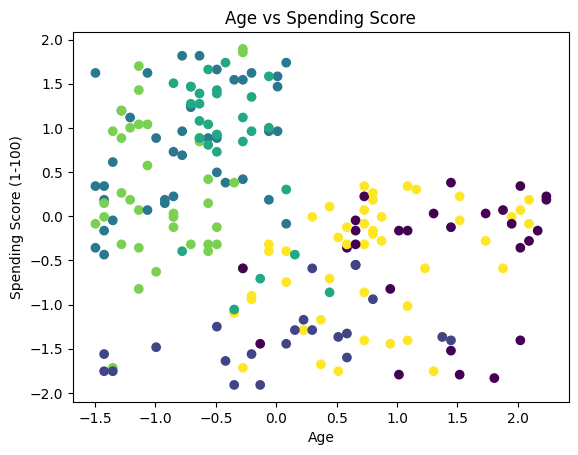

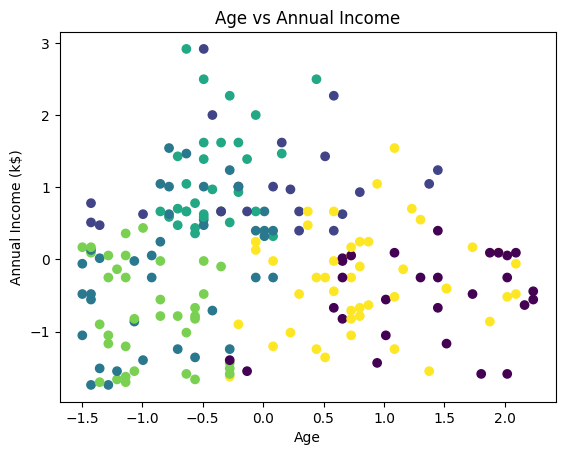

In [18]:
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'], c=df_scaled['cluster'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.show()

plt.scatter(df_scaled['Age'], df_scaled['Spending Score (1-100)'], c=df_scaled['cluster'])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score")
plt.show()

plt.scatter(df_scaled['Age'], df_scaled['Annual Income (k$)'], c=df_scaled['cluster'])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Age vs Annual Income")
plt.show()